In [19]:
import trackml

## Event hits

The hits file contains the following values for each hit/entry:

- hit_id: numerical identifier of the hit inside the event.
- x, y, z: measured x, y, z position (in millimeter) of the hit in global coordinates.
- volume_id: numerical identifier of the detector group.
- layer_id: numerical identifier of the detector layer inside the group.
- module_id: numerical identifier of the detector module inside the layer.

The volume/layer/module id could in principle be deduced from x, y, z. They are given here to simplify detector-specific data handling.


## Event truth
The truth file contains the mapping between hits and generating particles and the true particle state at each measured hit. Each entry maps one hit to one particle.

- hit_id: numerical identifier of the hit as defined in the hits file.
- particle_id: numerical identifier of the generating particle as defined in the particles file. A value of 0 means that the hit did not originate from a reconstructible particle, but e.g. from detector noise.
- tx, ty, tz true intersection point in global coordinates (in millimeters) between the particle trajectory and the sensitive surface.
- tpx, tpy, tpz true particle momentum (in GeV/c) in the global coordinate system at the intersection point. The corresponding vector is tangent to the particle trajectory at the intersection point.
- weight: per-hit weight used for the scoring metric; total sum of weights within one event equals to one.


## Event particles
The particles files contains the following values for each particle/entry:

- particle_id: numerical identifier of the particle inside the event.
- vx, vy, vz: initial position or vertex (in millimeters) in global coordinates.
- px, py, pz: initial momentum (in GeV/c) along each global axis.
- q: particle charge (as multiple of the absolute electron charge).
- nhits: number of hits generated by this particle.

All entries contain the generated information or ground truth.

## Event hit cells
The cells file contains the constituent active detector cells that comprise each hit. The cells can be used to refine the hit to track association. A cell is the smallest granularity inside each detector module, much like a pixel on a screen, except that depending on the volume_id a cell can be a square or a long rectangle. It is identified by two channel identifiers that are unique within each detector module and encode the position, much like column/row numbers of a matrix. A cell can provide signal information that the detector module has recorded in addition to the position. Depending on the detector type only one of the channel identifiers is valid, e.g. for the strip detectors, and the value might have different resolution.

- hit_id: numerical identifier of the hit as defined in the hits file.
- ch0, ch1: channel identifier/coordinates unique within one module.
- value: signal value information, e.g. how much charge a particle has deposited.
    
## Dataset submission information
The submission file must associate each hit in each event to one and only one reconstructed particle track. The reconstructed tracks must be uniquely identified only within each event. Participants are advised to compress the submission file (with zip, bzip2, gzip) before submission to the Kaggle site.

- event_id: numerical identifier of the event; corresponds to the number found in the per-event file name prefix.
- hit_id: numerical identifier of the hit inside the event as defined in the per-event hits file.
- track_id: user-defined numerical identifier (non-negative integer) of the track.


In [12]:
from trackml.dataset import load_dataset

idx = 0
for event_id, hits, cells, particles, truth in load_dataset('input/train_1'):
    print(idx)
    break

0


In [16]:
len(hits), len(cells), len(particles), len(truth)

(120939, 664996, 12263, 120939)

In [17]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [18]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [23]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [30]:
hits.layer_id.unique()

array([ 2,  4,  6,  8, 10, 12, 14])

In [31]:
hits.volume_id.unique()

array([ 7,  8,  9, 12, 13, 14, 16, 17, 18])

In [39]:
particles = list(set(truth.particle_id.values))

In [42]:
truth[truth.particle_id==22525763437723648]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.4922,0.000010
1419,1420,22525763437723648,-55.154400,0.621779,-1497.5,-0.569794,0.027264,-15.4928,0.000008
1459,1460,22525763437723648,-47.988098,0.315591,-1302.5,-0.568883,0.021994,-15.4929,0.000006
3169,3170,22525763437723648,-47.804100,0.308733,-1297.5,-0.571445,0.020847,-15.4933,0.000005
3233,3234,22525763437723648,-40.626099,0.087326,-1102.5,-0.569940,0.015274,-15.4934,0.000005
5342,5343,22525763437723648,-40.442200,0.082538,-1097.5,-0.570204,0.013872,-15.4940,0.000006
5423,5424,22525763437723648,-35.475899,-0.024284,-962.5,-0.569773,0.010668,-15.4940,0.000009
5481,5482,22525763437723648,-35.310101,-0.027160,-958.0,-0.571644,0.008881,-15.4949,0.000011
7866,7867,22525763437723648,-35.291698,-0.027451,-957.5,-0.571617,0.009012,-15.4950,0.000014
7950,7951,22525763437723648,-30.315399,-0.095482,-822.5,-0.570993,0.006231,-15.4951,0.000016


In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

        

In [166]:
def plot_volumes(df):
    figsize = (36, 5)
    fig = plt.figure(figsize=figsize)    
    
    volume_ids = [7, 8,  9, 12, 13, 14, 16, 17, 18]
    cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    for volume_idx, (volume_id, cmap) in enumerate(zip(volume_ids, cmaps)):
        ax = fig.add_subplot('1{}{}'.format(len(volume_ids), volume_idx+1), projection='3d')
        df_volume = df[df.volume_id==volume_id]
        ax.scatter(df_volume.x, df_volume.y, df_volume.z, c=df_volume.layer_id) #, c=df_volume.layer_id, cmap=plt.get_cmap(cmap))
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_xlim(-1000, 1000)
        ax.set_ylim(-1000, 1000)
        ax.set_zlim(-3000, 3000)
        ax.set_title('volume {}'.format(volume_id))
        #ax.view_init(0, 0)
    return ax


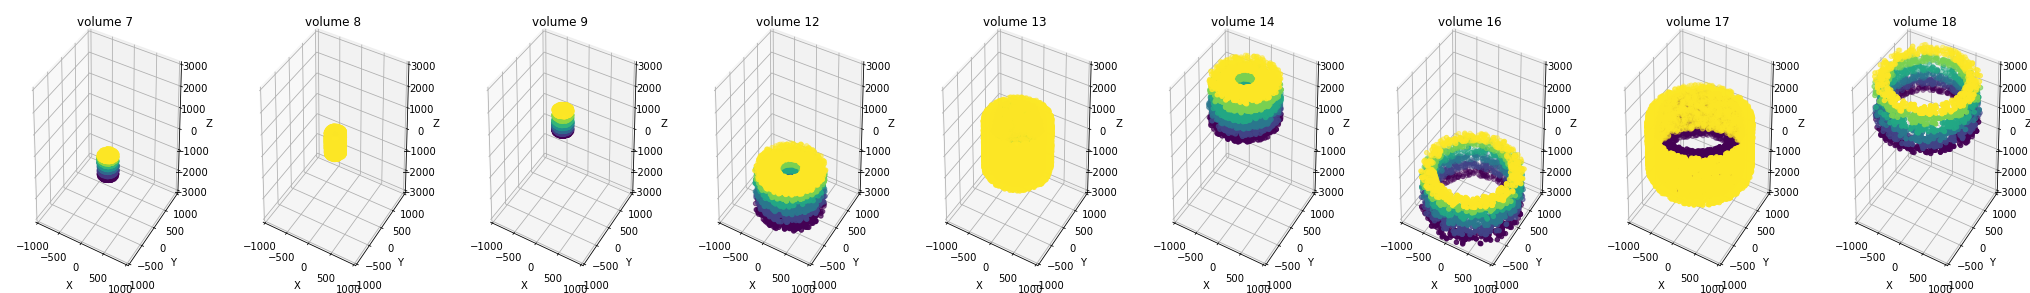

In [167]:
plot_volumes(df)

In [238]:
def plot_xz(df, color_by='layer_id'):
    figsize = (10, 10)
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    axes[0].scatter(df.x, df.z, c=df[color_by])
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("z")
    
    axes[1].scatter(df.x, df.y, c=df[color_by])
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("y")
    

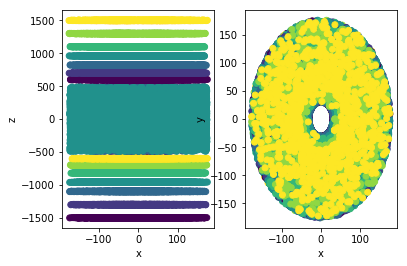

In [215]:
plot_xz(df[df.volume_id.isin([7,8,9])])

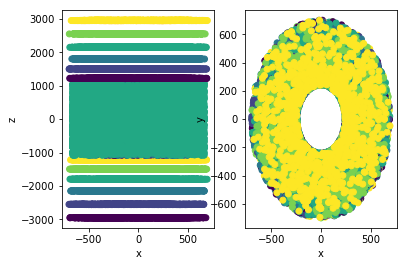

In [216]:
plot_xz(df[df.volume_id.isin([12,13,14])])

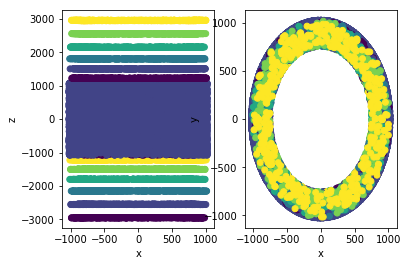

In [217]:
plot_xz(df[df.volume_id.isin([16,17,18])])

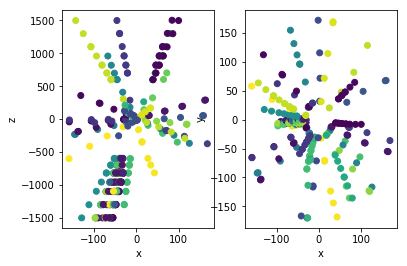

In [241]:
particle_ids = list(set(df.particle_id))
sample = df[df.particle_id.isin(particle_ids[1:50])]
plot_xz(sample[sample.volume_id.isin([7,8,9])], 'particle_id')

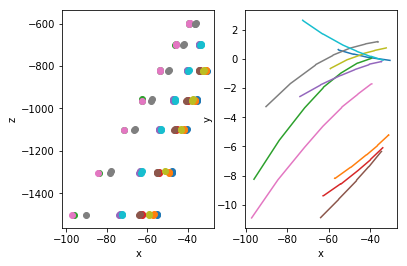

In [278]:
figsize = (10, 10)
fig, axes = plt.subplots(nrows=1, ncols=2)
    
for track_id in range(10):
    track = df[df.particle_id==particle_ids[1+track_id]]
    axes[0].scatter(track.x, track.z)
    axes[1].plot(track.x, track.y)
    
axes[0].set_xlabel("x")
axes[0].set_ylabel("z")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
    